## 밑바닥부터 시작하는 딥러닝(Deep Learning from Scratch) 챕터별 예제코드 정리 
예제코드가 기본이나 정확히 일치하지는 않습니다. 개인적으로 모든 코드들을 문서화하되 너무 기본적인 내용은 제외하거나 나름대로 더 필요하다고 생각되는 내용은 추가하였습니다. 같은 내용을 다른 방식으로 구현하는 경우도 있습니다.
## Chapter 6. 학습 관련 기술들
### 6.2 Appendix : Weight initialization comparison with mnist

### Load modules & library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
os.chdir('C:\\Users\\KBS\\PycharmProjects\\Deep_learning_scratch') # 아래의 module들이 있는 directory 설정
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

### Load mnist data

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

### Experiment settings
    Network structure : (784,100,100,100,100,10)

In [3]:
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

### Training network 

In [4]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 400 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.30248322014
Xavier:2.30968293186
He:2.42438254437
===========iteration:400===========
std=0.01:2.29985439437
Xavier:1.37994176662
He:0.556024220405
===========iteration:800===========
std=0.01:2.29579419452
Xavier:0.56328252303
He:0.382268631205
===========iteration:1200===========
std=0.01:2.30651320383
Xavier:0.345169687873
He:0.204013492785
===========iteration:1600===========
std=0.01:2.3031777425
Xavier:0.22226895045
He:0.146000021829


### Visualization
시각화 결과 위에서 설정한 어느정도 Deep 한 network에서는 표준편차 0.01이고 평균이 0인 정규분포로부터 값을 뽑아 Weight initialization을 하는 방법으로는 학습이 되지않음을 확인할 수 있다. 이유는 hidden node의 값이 한쪽으로 치우쳐 gradient vanishing이나 network capacity에 제한이 걸릴 수 있기 때문이다.

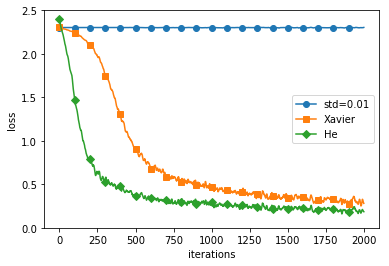

In [5]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()